# Use ML to predict the Heart Disease Motality based on the social local policies and life styles

### Target is classified in 4 categories
---
    4. High Rate
    3. Medium Rate
    2. Med-Low Rate
    1. Low Rate


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load all dependencies
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Query data from SQLite

In [3]:
#connect to database
path = "model/db/HeartDiseaseByCounty.db"
cnx = sqlite3.connect(path)

In [4]:
#Read dataframe from SQL query
df = pd.read_sql_query("SELECT f.*, t.Level FROM \
                        Features_State_Counties f \
                        JOIN State s ON f.State_Name = s.Name \
                        JOIN Heart_Disease_Mortality_State_Counties as t ON f.County = t.County AND s.Code = t.State_Code" \
                       , cnx)
df.head()

,State_Name,County,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,...,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education,Largest_sector,Avg_Temp_C,Avg_Precipitation_Inches,Level
0,Alaska,Aleutians East,17,3.4,2.8,17,51,5.3,30,100,...,544.0,358,1061,882,336,878,Manufacturing,4.9,57.44,1
1,Alaska,Aleutians West,15,3.0,2.5,15,44,7.6,30,100,...,550.0,459,1664,1309,675,1616,Manufacturing,5,69.95,1
2,Alaska,Anchorage,15,3.5,3.2,15,32,8.0,18,100,...,27075.0,11867,45753,66655,67719,99544,"Educational services, and health care and soci...",1.3,73.43,1
3,Alaska,Bethel,24,5.4,4.6,30,31,2.9,31,100,...,5869.0,1798,4371,2314,1194,8539,"Educational services, and health care and soci...",1.6,26.39,2
4,Alaska,Bristol Bay,15,3.7,3.6,18,42,6.9,29,100,...,96.0,36,225,240,144,232,Public administration,4.2,29.87,1


# Preprocess data

In [5]:
# View statistics dataframe columns
df.describe()

,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,Uninsured,Insured,Unreported_Insurance,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education,Level
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,...,3071.000000,3.071000e+03,3.072000e+03,3.071000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3072.000000
mean,17.832357,3.972363,4.149642,17.361979,32.817708,7.424577,27.353516,62.892578,17.485677,11.504232,...,8977.153696,7.683507e+04,1.892521e+04,1.330867e+04,8.599790e+03,1.891054e+04,2.031700e+04,2.208112e+04,3.480105e+04,2.469727
std,4.704372,0.696459,0.592199,3.548037,5.430713,1.270692,5.692320,23.424658,3.176629,5.190727,...,35474.297222,2.526495e+05,5.313433e+04,4.601938e+04,3.762167e+04,5.130057e+04,6.145624e+04,8.044333e+04,1.125637e+05,1.104914
min,8.000000,2.400000,2.500000,6.000000,12.000000,0.000000,10.000000,0.000000,8.000000,0.000000,...,23.000000,1.190000e+02,1.000000e+01,5.000000e+00,4.000000e+00,1.500000e+01,2.400000e+01,0.000000e+00,1.900000e+01,1.000000
25%,14.000000,3.500000,3.700000,15.000000,29.000000,6.900000,24.000000,49.000000,15.000000,7.000000,...,876.500000,7.245000e+03,2.538500e+03,1.565500e+03,9.677500e+02,2.745750e+03,2.277250e+03,1.194750e+03,3.283500e+03,2.000000
50%,17.000000,3.900000,4.200000,17.000000,33.000000,7.700000,27.000000,66.000000,18.000000,11.000000,...,2140.000000,1.743800e+04,5.767000e+03,3.724000e+03,2.464500e+03,6.334000e+03,5.325500e+03,3.162500e+03,7.950500e+03,2.000000
75%,21.000000,4.400000,4.600000,20.000000,36.000000,8.200000,31.000000,80.000000,20.000000,15.000000,...,5675.500000,4.730000e+04,1.444550e+04,9.175500e+03,5.667500e+03,1.511100e+04,1.442075e+04,1.049675e+04,2.250150e+04,4.000000
max,41.000000,6.500000,6.300000,41.000000,58.000000,10.000000,50.000000,100.000000,29.000000,34.000000,...,935213.000000,7.703359e+06,1.527541e+06,1.409155e+06,1.460718e+06,1.416482e+06,1.790808e+06,2.177481e+06,3.260029e+06,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1fa4ad10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f972790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1fa4a050>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1fa4add0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1fa41e50>],
 'means': []}

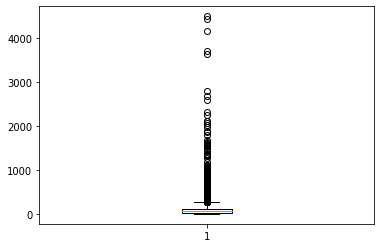

In [6]:
# This feature has so many outliers

series = df["Average_Traffic_Volume_per_Meter_of_Major_Roadways"]
plt.boxplot(series) 

In [7]:
#let drop the column
df.drop(columns=["Average_Traffic_Volume_per_Meter_of_Major_Roadways"], inplace=True)

In [8]:
col_count = df.count()
col_count

State_Name                                     3072
County                                         3072
Percent_Fair_or_Poor_Health                    3072
Average_Number_of_Physically_Unhealthy_Days    3072
Average_Number_of_Mentally_Unhealthy_Days      3072
                                               ... 
Unreported_education                           3072
Largest_sector                                 3072
Avg_Temp_C                                     3072
Avg_Precipitation_Inches                       3072
Level                                          3072
Length: 70, dtype: int64

In [9]:
# Find columns that contain NULL value
col_null = list(col_count[col_count != 3072].index)
col_null

['Household_Income_AIAN',
 'Household_Income_Asian',
 'Household_Income_Black',
 'Household_Income_Hispanic',
 'Household_Income_White',
 'Percent_Severe_Housing_Cost_Burden',
 'Percent_Children_in_Poverty',
 'Teen_Birth_Rate',
 'Uninsured',
 'Insured',
 'Poverty']

In [10]:
# drop columns
df.drop(columns=["Percent_Severe_Housing_Cost_Burden","Percent_Children_in_Poverty","Teen_Birth_Rate"], inplace=True)


In [11]:
# Convert to numbers
df['Avg_Temp_C'] = pd.to_numeric(df['Avg_Temp_C'], errors='coerce')
df['Avg_Precipitation_Inches'] = pd.to_numeric(df['Avg_Precipitation_Inches'], errors='coerce')

In [12]:
# Fill value columns
df.fillna(value=0,inplace=True)

In [13]:
col_count = df.count()
col_count

State_Name                                     3072
County                                         3072
Percent_Fair_or_Poor_Health                    3072
Average_Number_of_Physically_Unhealthy_Days    3072
Average_Number_of_Mentally_Unhealthy_Days      3072
                                               ... 
Unreported_education                           3072
Largest_sector                                 3072
Avg_Temp_C                                     3072
Avg_Precipitation_Inches                       3072
Level                                          3072
Length: 67, dtype: int64

In [14]:
# Drop Combo keys of dataframe
keys = ['State_Name', 'County']

In [15]:
# Find Object Type Columns 
obj_cols =list(df.dtypes[df.dtypes=='object'].index)
obj_cols = [ name for name in obj_cols if not name in keys]
obj_cols

['Largest_sector']

In [16]:
# Find number unique values in the series columns
df[obj_cols].nunique()

Largest_sector    10
dtype: int64

In [17]:
# Covert object columns to numbers
df_encoder = pd.get_dummies(df[obj_cols])
df_encoder

,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3067,0,0,0,1,0,0,0,0,0,0
3068,0,1,0,0,0,0,0,0,0,0
3069,0,0,0,1,0,0,0,0,0,0
3070,0,0,0,1,0,0,0,0,0,0


In [18]:
# Merge the two DataFrames together and drop the Country column
df = df.merge(df_encoder,left_index=True,right_index=True)
df.head()

,State_Name,County,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,...,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,Alaska,Aleutians East,17,3.4,2.8,17,51,5.3,30,100,...,0,0,0,0,1,0,0,0,0,0
1,Alaska,Aleutians West,15,3.0,2.5,15,44,7.6,30,100,...,0,0,0,0,1,0,0,0,0,0
2,Alaska,Anchorage,15,3.5,3.2,15,32,8.0,18,100,...,0,0,0,1,0,0,0,0,0,0
3,Alaska,Bethel,24,5.4,4.6,30,31,2.9,31,100,...,0,0,0,1,0,0,0,0,0,0
4,Alaska,Bristol Bay,15,3.7,3.6,18,42,6.9,29,100,...,0,0,0,0,0,0,1,0,0,0


# Select Features and Target for ML

In [19]:
# Drop column list
# Column Level is Target
drop_cols = keys + obj_cols + ["Level"]
# Target
y = df["Level"].values
print(y[:5])
# Create our features
X = df.drop(columns= drop_cols)
print(X.columns)
X.head()

[1 1 1 2 1]
Index(['Percent_Fair_or_Poor_Health',
       'Average_Number_of_Physically_Unhealthy_Days',
       'Average_Number_of_Mentally_Unhealthy_Days', 'Percent_Smokers',
       'Percent_Adults_with_Obesity', 'Food_Environment_Index',
       'Percent_Physically_Inactive',
       'Percent_With_Access_to_Exercise_Opportunities',
       'Percent_Excessive_Drinking', 'Percent_Uninsured',
       'Primary_Care_Physicians_Rate', 'Dentist_Rate',
       'Mental_Health_Provider_Rate', 'Preventable_Hospitalization_Rate',
       'Percent_Vaccinated', 'High_School_Graduation_Rate',
       'Percent_Some_College', 'Percent_Unemployed',
       'Percent_Single_Parent_Households', 'Social_Association_Rate',
       'Violent_Crime_Rate', 'Polution_Average_Daily_PM2.5',
       'Presence_of_Water_Violation', 'Percent_Severe_Housing_Problems',
       'Percent_Drive_Alone_to_Work', 'Percent_Long_Commute',
       'Percent_Adults_with_Diabetes',
       'Percent_Limited_Access_to_Healthy_Foods', 'Median_Hous

,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,17,3.4,2.8,17,51,5.3,30,100,17,28,...,0,0,0,0,1,0,0,0,0,0
1,15,3.0,2.5,15,44,7.6,30,100,19,20,...,0,0,0,0,1,0,0,0,0,0
2,15,3.5,3.2,15,32,8.0,18,100,21,13,...,0,0,0,1,0,0,0,0,0,0
3,24,5.4,4.6,30,31,2.9,31,100,22,20,...,0,0,0,1,0,0,0,0,0,0
4,15,3.7,3.6,18,42,6.9,29,100,21,17,...,0,0,0,0,0,0,1,0,0,0


# Split Features and Target with the ratio 25% Test and 75% Train

In [20]:
# Create X_train, X_test, y_train, y_test
# Test Size is 25% and Train Size 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=78, stratify=y)

In [21]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

# Statistics to find the best ML methods 

LDA: 0.5494786373047242 (0.023295276714424818)
KNC: 0.5025917560700169 (0.030261960576747692)
NB: 0.3055467720685113 (0.01806474450978476)
SVM: 0.5659702616224356 (0.030100402396391942)
LR: 0.5486109542631281 (0.030081757750587815)
DTC: 0.4731093544137023 (0.023871870974331067)
RFC: 0.5642330133634481 (0.031099525109631144)
ETC: 0.5546828533785055 (0.035208084314158304)
ABC: 0.5343365330321853 (0.043811367657711625)
GBC: 0.5607980425371729 (0.03091027896531636)


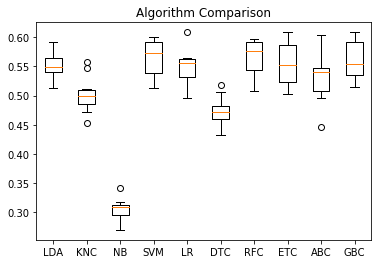

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Spot Check Algorithms
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR',LogisticRegression(solver='lbfgs')))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier(n_estimators=100)))
models.append(('ETC',ExtraTreesClassifier(n_estimators=100)))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
              
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=78, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Random Forest Classifier 0.5603(0.0458)
Looking at the Algorithm Comparison Chart, Random Forest Classifier is the best result. The mean of number prediction is **56%** and standard deviation is **4.6%**. We can tune up the number estimator and the tree depth level to reach the best result.

However, we still run the analysis of other MLs for comparations

# PCA
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [23]:
#using Principle Component Analysis find few PCA and the feature contribution to each one of them

In [24]:
from sklearn.decomposition import PCA

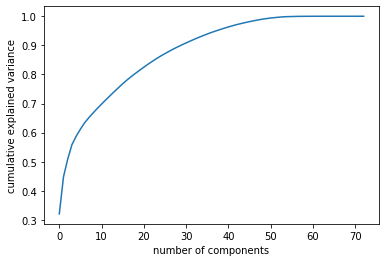

In [25]:
#to figure out the optimal number of components needed to describe the data using PCA
pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Conclusion on Number of Components:

  20 components would give 80% variance which seems to be really good (even though 30 components would give 90% variance)

In [26]:
#re-initial pca model with number of components determined
n_components = 20
pca = PCA(n_components=n_components)

In [27]:
X_trained_pca = pca.fit_transform(X_train_scaled)
#let's check the shape of X_trained_pca array
print ("shape of X_pca", X_trained_pca.shape)

shape of X_pca (2304, 20)


In [28]:
#once pca is trained lets get the variance ratio and its details
ex_variance=np.var(X_trained_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio )

[0.39398685 0.15737243 0.07454127 0.06088889 0.03538335 0.03000617
 0.02680297 0.02151748 0.02000674 0.01902673 0.01823851 0.01774961
 0.01751634 0.0170536  0.01680131 0.01658522 0.01543531 0.01439392
 0.01358065 0.01311261]


In [29]:
#Lets visualize PCA component with feature contribution in a heatmeat 

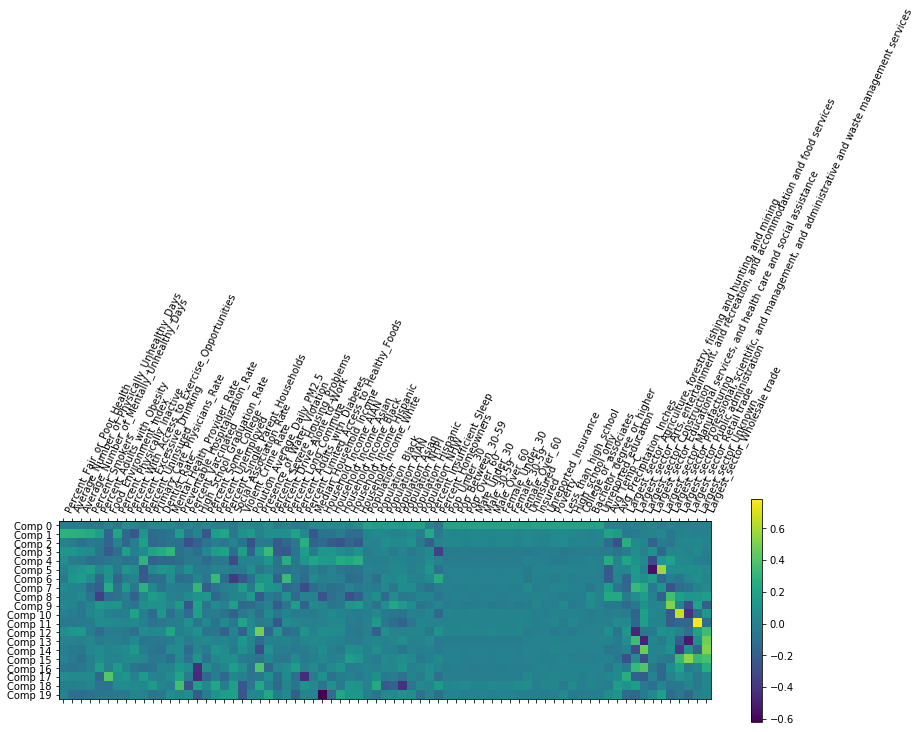

In [30]:
plt.matshow(pca.components_,cmap='viridis')
pca_column_names = []
pca_column_index = []
for i in range(n_components):
    pca_column_index.append(i)
    pca_column_names.append("Comp "+ str(i))
    
plt.yticks(pca_column_index,
           pca_column_names, fontsize=10)
plt.colorbar()
plt.xticks(range(len(X.columns)),X.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

In [31]:
# top 5 feature importance for top 6 components which contributes to 71% of variance
top_N_Features = 10
n_components_interest = 6
for i in range(n_components_interest):
    important_features = pca.components_[i]
    top_N_Features_pca = sorted(zip(important_features, X.columns), reverse=True)[:top_N_Features]
    print (f'-------- Component {i} ------')
    for feature_variance in top_N_Features_pca:
        print (feature_variance)
    print (f'--------------')

-------- Component 0 ------
(0.20406784935834882, 'Population')
(0.2038407202964448, 'Insured')
(0.20306399080759086, 'Unreported_education')
(0.20266322330453435, 'College_or_associates')
(0.20203242772121952, 'Unreported_Insurance')
(0.2012533883552808, 'Pop_Between_30-59')
(0.20125279920655095, 'Female_30-59')
(0.20118609083506322, 'Male_30-59')
(0.2010012997470678, 'Male_Under_30')
(0.20099695559706665, 'Pop_Under_30')
--------------
-------- Component 1 ------
(0.2888304422893956, 'Percent_Fair_or_Poor_Health')
(0.28160406457763504, 'Average_Number_of_Physically_Unhealthy_Days')
(0.2653656071677779, 'Average_Number_of_Mentally_Unhealthy_Days')
(0.24568912083681074, 'Percent_Smokers')
(0.23867722537640662, 'Percent_Insufficient_Sleep')
(0.21349609495187688, 'Percent_Physically_Inactive')
(0.20731931676987292, 'Percent_Single_Parent_Households')
(0.1989845454922833, 'Percent_Adults_with_Diabetes')
(0.19857083744911058, 'Avg_Temp_C')
(0.16893468089625105, 'Percent_Adults_with_Obesity

In [32]:
#import dependency for visualization library seaborn

import math
import seaborn as sns

In [33]:
column_names_mapped = {'Percent_Fair_or_Poor_Health': 'Fair_or_Poor_Health',
                       'Average_Number_of_Physically_Unhealthy_Days': 'Avg_Physical_Unhealthy_Days',
                       'Average_Number_of_Mentally_Unhealthy_Days': 'Avg_Mental_Unhealthy_Days',
                       'Percent_Smokers': '%_Smokers',
                       'Percent_Adults_with_Obesity': '%_Adult_Obesity',
                       'Percent_Physically_Inactive': '%_Physically_Inactive',
                       'Percent_With_Access_to_Exercise_Opportunities': '%_Access_Exercise_Opport',
                       'Percent_Excessive_Drinking': '%_Excessive_Drinking',
                       'Primary_Care_Physicians_Rate': 'Prim_Care_Physic_Rate',
                       'Preventable_Hospitalization_Rate': 'Prevent_Hospital_Rate',
                       'Percent_Vaccinated': '%_Vaccinated',
                       'Percent_Some_College': '%_Some_College',
                       'Percent_Unemployed': '%_Unemployed',
                       'Percent_Single_Parent_Households': '%_Single_Parent_Household',
                       'Polution_Average_Daily_PM2': 'Polution_Avg_Daily_PM2',
                       'Presence_of_Water_Violation': '%_Water_Violation',
                       'Percent_Severe_Housing_Problems': '%_Severe_Housing_Prob.',
                       'Percent_Drive_Alone_to_Work': '%_Drive_Alone_Work',
                       'Percent_Long_Commute': '%_Long_Commute',
                       'Percent_Adults_with_Diabetes': '%_Adult_Diabetes',
                       'Percent_Limited_Access_to_Healthy_Foods': '%_Access_Healthy_Foods',
                       'Percent_Insufficient_Sleep': '%_Insufficient_Sleep',
                       'Average_Traffic_Volume_per_Meter_of_Major_Roadways': 'Avg_Traffic',
                       'Percent_Homeowners': '%_Homeowners',
                       'Percent_Severe_Housing_Cost_Burden': '%_Severe_Housing_Cost_Burden',
                       'Percent_Children_in_Poverty': '%_Children_Poverty'
                      }

df_renamed = df.copy()
df_renamed = df_renamed.rename(columns=column_names_mapped)
df_renamed.head()

,State_Name,County,Fair_or_Poor_Health,Avg_Physical_Unhealthy_Days,Avg_Mental_Unhealthy_Days,%_Smokers,%_Adult_Obesity,Food_Environment_Index,%_Physically_Inactive,%_Access_Exercise_Opport,...,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,Alaska,Aleutians East,17,3.4,2.8,17,51,5.3,30,100,...,0,0,0,0,1,0,0,0,0,0
1,Alaska,Aleutians West,15,3.0,2.5,15,44,7.6,30,100,...,0,0,0,0,1,0,0,0,0,0
2,Alaska,Anchorage,15,3.5,3.2,15,32,8.0,18,100,...,0,0,0,1,0,0,0,0,0,0
3,Alaska,Bethel,24,5.4,4.6,30,31,2.9,31,100,...,0,0,0,1,0,0,0,0,0,0
4,Alaska,Bristol Bay,15,3.7,3.6,18,42,6.9,29,100,...,0,0,0,0,0,0,1,0,0,0


In [34]:
def createDensityAndScatterVisualization(rows, columns, important_features, column_names, top_N_Features):
    top_n_column_names = list()

    figsize_height = 10 * rows
    figsize_width = columns
    f, ax = plt.subplots(rows, columns, figsize=(figsize_height, figsize_width))


    #important_features = pca.components_[0]
    top_N_Features_pca = sorted(zip(important_features, column_names), reverse=True)[:top_N_Features]

    for variance,feature in top_N_Features_pca:
        top_n_column_names.append(feature)

    counter = 0
    for i in range(rows):
        for j in range(columns):
            if (counter < len(top_n_column_names) - 1):
                sns.distplot(df_renamed[top_n_column_names[counter]], color="m", ax=ax[i, j])
                counter += 1

    top_n_column_names.append('Level')

    df_slice = df_renamed[top_n_column_names]
    #df_slice.head()
    sns.pairplot(df_slice, hue="Level")

    plt.setp(ax, yticks=[])
    plt.tight_layout()

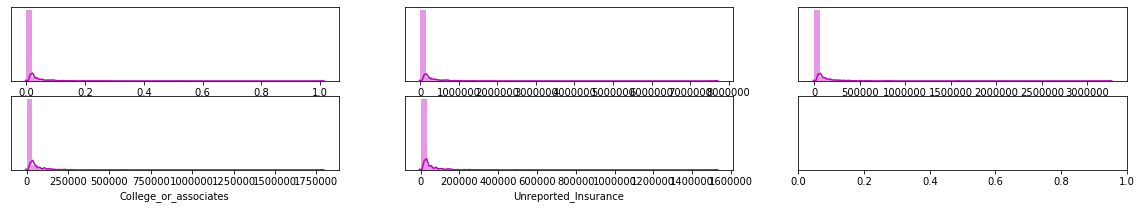

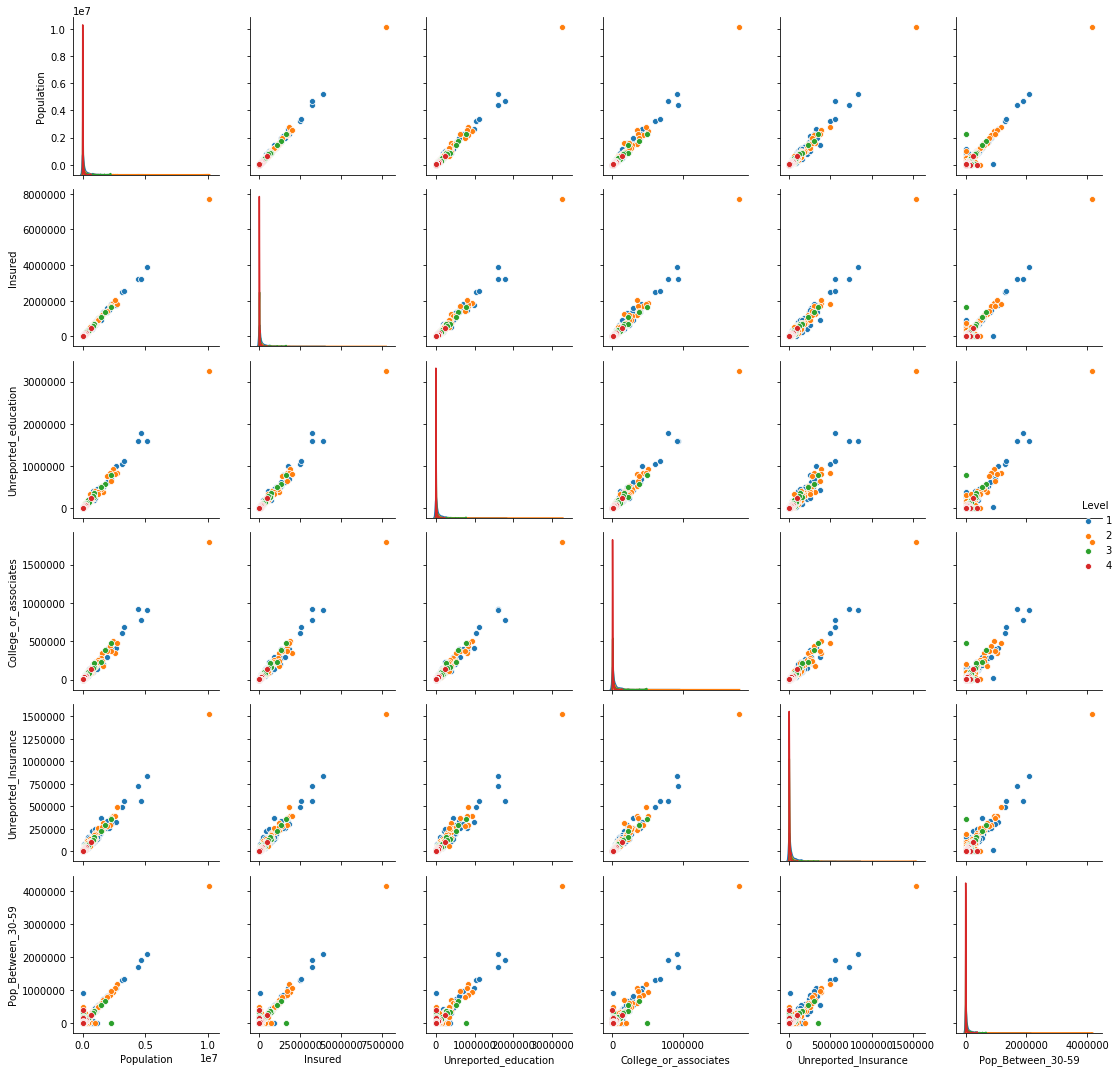

In [36]:
#visualization using distribution plot for top N features from first 2 component

# for charting purpose reducing the number of top_n_features we plot
top_N_Features = 6

column_count = 3
row_count = math.ceil(top_N_Features / column_count )

column_names = [column_names_mapped[column] if column in column_names_mapped.keys() else column for column in X.columns]
#print(column_names)
createDensityAndScatterVisualization(row_count, column_count, pca.components_[0], column_names, top_N_Features)



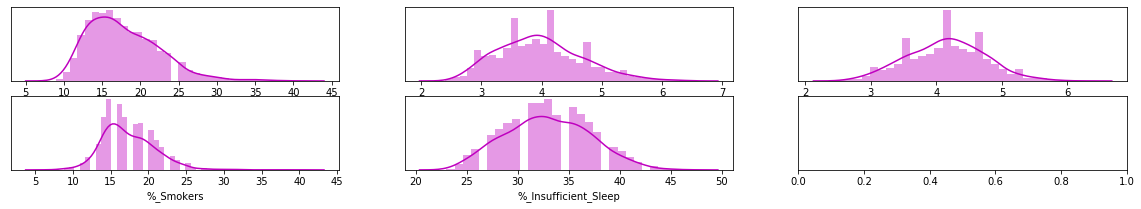

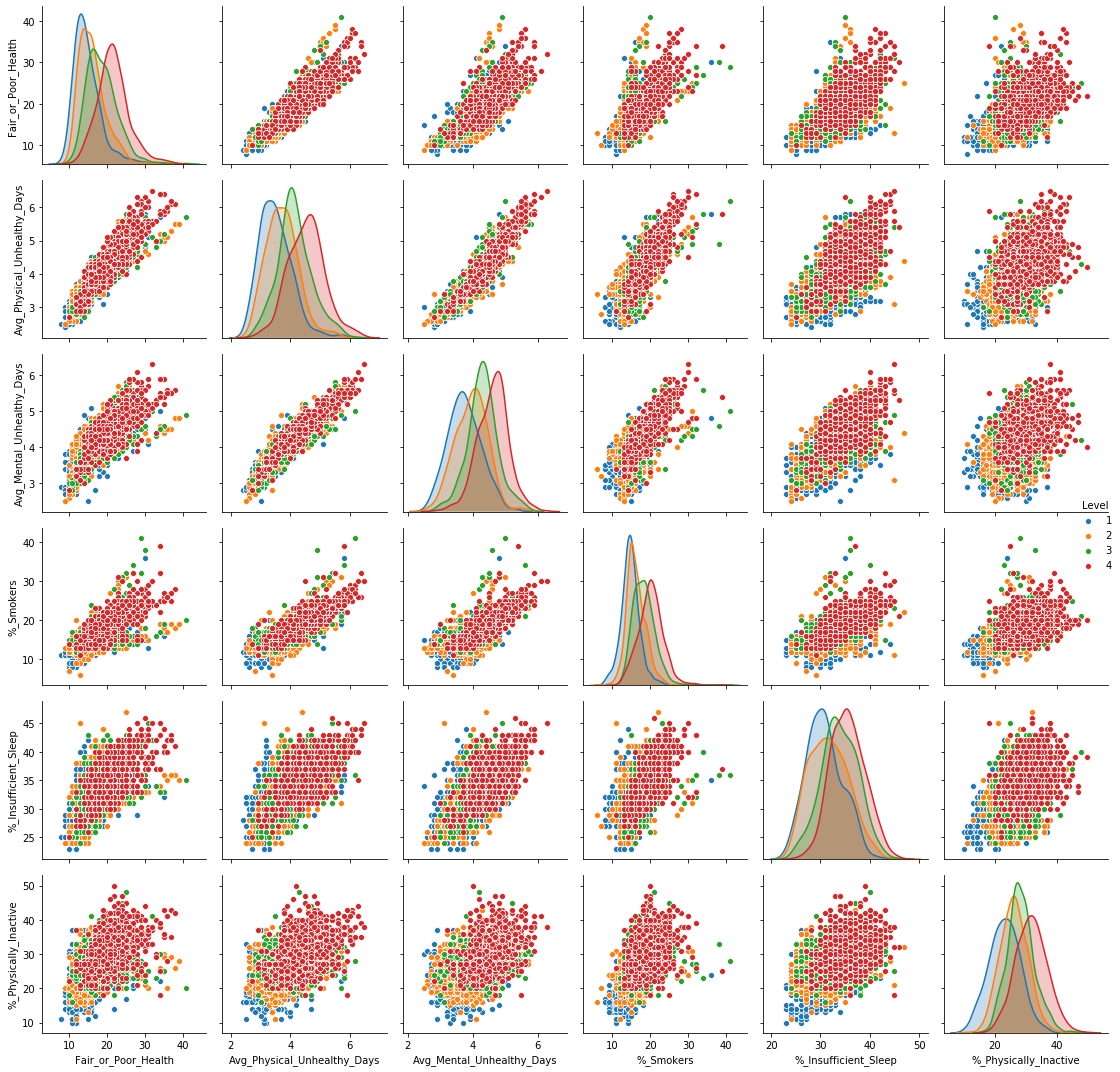

In [37]:
createDensityAndScatterVisualization(row_count, column_count, pca.components_[1], column_names, top_N_Features)

# What do we understand from the heatmap


| Component| Features | weigtage |
| --- | --- | --- |
| 0  |  Population, Population split by Gender/Age, Poverty, Insurance | 39% |
| 1  |  Health related, Smoking, Obesity, Food Index, Education, Unemployed, Insufficent sleep | 15% |
| 2  | Access to healthy food, Job sector (farming, forestry, mining),Uninsured, Population demographic, Education  | 7% |
| 3  | Housing Problem, Different healthcare provider rate per population, Crime rate, Excercise opportunity | 6% |
| 4  | Uninsured, Median houshold income by demographic, Long commute, Temperature, Job sectors(Farming, Professional)  | 3% |
| 4  | Job sectors (Manaufacture, Entertainment), Smokers, Insufficient sleep,Different healthcare provider rate per population, Health related  | ~3% |

Above table shows some of the features which plays major role in each component.

# KNeighbors
Classifier implementing the k-nearest neighbors vote.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=500)

In [31]:
kn_model = kn_model.fit(X_train_scaled, y_train)

In [32]:
# Run the test with model
y_pred = kn_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.51953125

In [33]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,55,114,1,10
Actual 2,13,182,1,43
Actual 3,1,86,2,67
Actual 4,1,30,2,160


In [34]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.31      0.44       180
           2       0.44      0.76      0.56       239
           3       0.33      0.01      0.02       156
           4       0.57      0.83      0.68       193

    accuracy                           0.52       768
   macro avg       0.53      0.48      0.43       768
weighted avg       0.53      0.52      0.45       768



### Summary
**KNeighbors** accuracy is 52%. The lowest recall is level 3 (Medium - Heart Disease Motality) 1% while level 1 (low) is 31%, level 2 (mid-low) is 76% and level 4 is 83%. We need to take another methods to improve the accuracy and the recall.

# SVM
Support Vector Machines

In [35]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')

In [36]:
svc_model = svc_model.fit(X_train_scaled, y_train)

In [37]:
# Run the test with model
y_pred = svc_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5546875

In [38]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,96,72,7,5
Actual 2,35,158,25,21
Actual 3,6,64,40,46
Actual 4,5,25,31,132


In [39]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.53      0.60       180
           2       0.50      0.66      0.57       239
           3       0.39      0.26      0.31       156
           4       0.65      0.68      0.66       193

    accuracy                           0.55       768
   macro avg       0.55      0.53      0.53       768
weighted avg       0.55      0.55      0.55       768



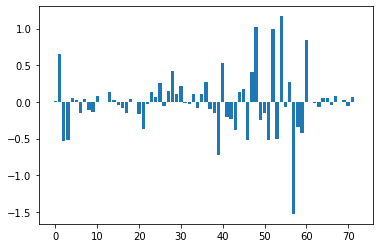

[(1.1678242228119622, 'Unreported_Insurance'),
 (1.0275513159801335, 'Male_Over_60'),
 (0.9996900342817829, 'Uninsured'),
 (0.8419462858197555, 'Unreported_education'),
 (0.6535820391420373, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.5318987305663114, 'Population_NHW'),
 (0.4186822591788655, 'Median_Household_Income'),
 (0.41238996530253935, 'Male_30-59'),
 (0.2716849456167907, 'Population_AIAN'),
 (0.2686600664415548, 'Less_than_high_school')]

In [40]:
# get importance
importances = svc_model.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

### Summary
**SVM** accuracy is 55%. The lowest recall is level 3 (Medium - Heart Disease Motality) 26% while level 1 (low) is 53%, level 2 (mid-low) is 66% and level 4 is 68%. This is better than **LNeighbors**.

# Linear Discriminant Analysis
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()

In [42]:
lda_model = lda_model.fit(X_train_scaled, y_train)

In [43]:
# Run the test with model
y_pred = lda_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5559895833333334

In [44]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,92,77,5,6
Actual 2,35,157,23,24
Actual 3,5,68,44,39
Actual 4,2,26,31,134


In [45]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.51      0.59       180
           2       0.48      0.66      0.55       239
           3       0.43      0.28      0.34       156
           4       0.66      0.69      0.68       193

    accuracy                           0.56       768
   macro avg       0.56      0.54      0.54       768
weighted avg       0.56      0.56      0.55       768



In [ ]:
# get importance
importances = lda_model.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

### Summary
**Linear Discriminant Analysis** accuracy is 56%. The lowest recall is level 3 (Medium - Heart Disease Motality) 28% while level 1 (low) is 51%, level 2 (mid-low) is 66% and level 4 is 69%. This is better than **SVM** in both the accuracy and the recall.

# Logistic Regression

In [47]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', random_state=78)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=78, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Run the test with model
y_pred = lr_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5494791666666666

In [49]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,99,70,5,6
Actual 2,37,155,20,27
Actual 3,8,58,34,56
Actual 4,7,21,31,134


In [50]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.55      0.60       180
           2       0.51      0.65      0.57       239
           3       0.38      0.22      0.28       156
           4       0.60      0.69      0.64       193

    accuracy                           0.55       768
   macro avg       0.54      0.53      0.52       768
weighted avg       0.54      0.55      0.54       768



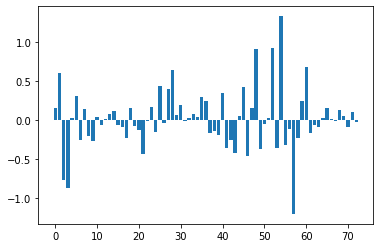

[(1.3371486903814946, 'Unreported_Insurance'),
 (0.9335783298969544, 'Uninsured'),
 (0.9112206118953725, 'Male_Over_60'),
 (0.6848657372990613, 'Unreported_education'),
 (0.6471205122331073, 'Median_Household_Income'),
 (0.6124658186650836, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.43577626996075003, 'Percent_Long_Commute'),
 (0.4244895538285489, 'Pop_Over_60'),
 (0.39929707152366073, 'Percent_Limited_Access_to_Healthy_Foods'),
 (0.3467266054424456, 'Population_NHW')]

In [51]:
# get importance
importances = lr_model.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]


### Summary
**Logistic Regression** accuracy is 55%. The lowest recall is level 3 (Medium - Heart Disease Motality) 22% while level 1 (low) is 55%, level 2 (mid-low) is 65% and level 4 is 69%. This is not good to compare to **Linear Discriminant Analysis**

Therefore **Linear Discriminant Analysis** is the best in linear classifiers in both the accuracy and the recall.

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
# Create a model Decision Tree
dt_model =  DecisionTreeClassifier(random_state=78) 

In [53]:
dt_model = dt_model.fit(X_train_scaled, y_train)

In [54]:
# Run the test with model
y_pred = dt_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.4934895833333333

In [55]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,101,55,14,10
Actual 2,58,106,55,20
Actual 3,17,45,53,41
Actual 4,5,28,41,119


In [56]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.56      0.56       180
           2       0.45      0.44      0.45       239
           3       0.33      0.34      0.33       156
           4       0.63      0.62      0.62       193

    accuracy                           0.49       768
   macro avg       0.49      0.49      0.49       768
weighted avg       0.50      0.49      0.49       768



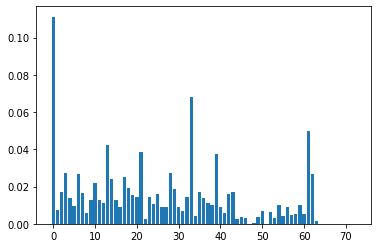

[(0.11123553815760855, 'Percent_Fair_or_Poor_Health'),
 (0.06803364997200974, 'Household_Income_White'),
 (0.0497300738022867, 'Avg_Temp_C'),
 (0.04212134186079477, 'Preventable_Hospitalization_Rate'),
 (0.03865984410006919, 'Polution_Average_Daily_PM2.5'),
 (0.037275400253272244, 'Population_Hispanic'),
 (0.027477449384679446, 'Median_Household_Income'),
 (0.027078823952605496, 'Percent_Smokers'),
 (0.026555107433913736, 'Percent_Physically_Inactive'),
 (0.02648661506897973, 'Avg_Precipitation_Inches')]

In [57]:
importances = dt_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

### Summary
**Decision Tree** accuracy is 49%. The lowest recall is level 3 (Medium - Heart Disease Motality) 34% while level 1 (low) is 56%, level 2 (mid-low) is 44% and level 4 is 62%. This is very low in the accuracy, but it is better for the recall. We needs to other tree classifiers

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
for d in range(4,14):
    # Create a random forest classifier.
    # Create a random forest classifier.
    rf_model = RandomForestClassifier(n_estimators=500, random_state=78, max_depth= d, criterion='entropy') 
    rf_model = rf_model.fit(X_train_scaled, y_train)
    # Run the test with model
    y_pred = rf_model.predict(X_test_scaled)
    # Find accuracy
    print(f'Depth: {d}, Accuracy: {accuracy_score(y_test, y_pred)}')

Depth: 4, Accuracy: 0.5520833333333334
Depth: 5, Accuracy: 0.5625
Depth: 6, Accuracy: 0.5677083333333334
Depth: 7, Accuracy: 0.5833333333333334
Depth: 8, Accuracy: 0.5859375
Depth: 9, Accuracy: 0.5833333333333334
Depth: 10, Accuracy: 0.5950520833333334
Depth: 11, Accuracy: 0.5833333333333334
Depth: 12, Accuracy: 0.5963541666666666
Depth: 13, Accuracy: 0.5963541666666666


In [60]:
# Best depth
depth = 10
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78, max_depth= depth, criterion='entropy') 
rf_model = rf_model.fit(X_train_scaled, y_train)
# Run the test with model
y_pred = rf_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5950520833333334

In [61]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,109,63,3,5
Actual 2,38,160,20,21
Actual 3,4,58,46,48
Actual 4,2,24,25,142


In [62]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.61      0.65       180
           2       0.52      0.67      0.59       239
           3       0.49      0.29      0.37       156
           4       0.66      0.74      0.69       193

    accuracy                           0.60       768
   macro avg       0.60      0.58      0.58       768
weighted avg       0.59      0.60      0.59       768



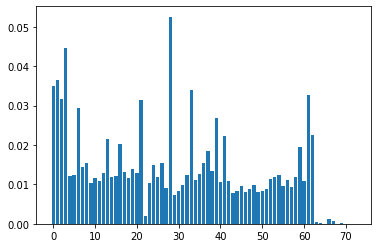

[(0.052585043268838234, 'Median_Household_Income'),
 (0.04468327835805024, 'Percent_Smokers'),
 (0.036619315093717734, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.03489871851010317, 'Percent_Fair_or_Poor_Health'),
 (0.0338914058512962, 'Household_Income_White'),
 (0.03271814564547063, 'Avg_Temp_C'),
 (0.03170636082746897, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.031328109871030026, 'Polution_Average_Daily_PM2.5'),
 (0.02951192243852611, 'Percent_Physically_Inactive'),
 (0.02696645316730626, 'Population_Hispanic')]

In [63]:
importances = rf_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

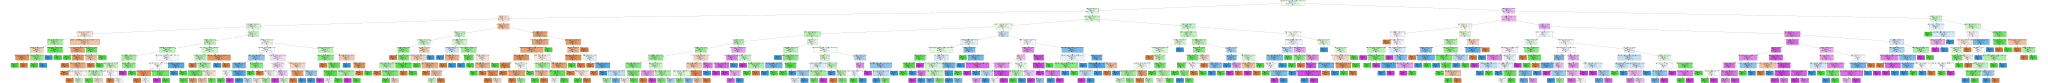

In [64]:
#Print Tree
import graphviz
from sklearn import tree
classification_tree = tree.export_graphviz(rf_model.estimators_[0], out_file=None,
                      feature_names=X.columns,
                      class_names=["1","2","3","4"],
                      filled=True)
graph = graphviz.Source(classification_tree)
graph

### Summary
**Random Forest** accuracy is **60%**. The lowest recall is level 3 (Medium - Heart Disease Motality) 29% while level 1 (low) is 61%, level 2 (mid-low) is 64% and level 4 is 74%. The accuracy is the best so far and the recall is much better to compare to another ML classifiers

# Random Forest - features selected by PCA

In [38]:
# Trial to see how does the model's accuracy, precision and recall with the features (dimension reduced) from PCA model

In [41]:
#max_depth for the RandomForest was kept at some level where the models predictions where better
depth = 2
estimator_count = 1000
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=estimator_count, random_state=78, max_depth= depth, 
                                  criterion='entropy') 
rf_model = rf_model.fit(X_trained_pca, y_train)
# Run the test with model
X_test_pca = pca.fit_transform(X_test_scaled) 
y_pred = rf_model.predict(X_test_pca)
# Find accuracy
accuracy_score(y_test, y_pred)

0.4830729166666667

In [42]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,58,111,0,11
Actual 2,33,168,0,38
Actual 3,10,90,0,56
Actual 4,2,46,0,145


In [43]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.32      0.41       180
           2       0.40      0.70      0.51       239
           3       0.00      0.00      0.00       156
           4       0.58      0.75      0.65       193

    accuracy                           0.48       768
   macro avg       0.39      0.44      0.39       768
weighted avg       0.40      0.48      0.42       768



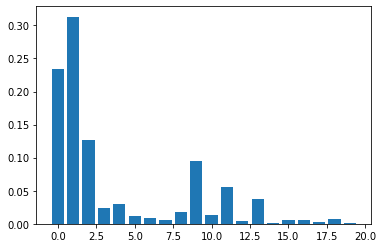

[(0.3130684157202634, 'Comp 1'),
 (0.2333810800205093, 'Comp 0'),
 (0.12621748866229432, 'Comp 2'),
 (0.09514153744404642, 'Comp 9'),
 (0.055163922481074226, 'Comp 11'),
 (0.03707078682308827, 'Comp 13'),
 (0.02991319720210435, 'Comp 4'),
 (0.02389632543384933, 'Comp 3'),
 (0.0173876308638106, 'Comp 8'),
 (0.012685855206384988, 'Comp 10')]

In [44]:
importances = rf_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, pca_column_names), reverse=True)[:10]

# Extra Trees

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
# Create a extra Trees classifier.
et_model = ExtraTreesClassifier(n_estimators=2000, random_state=78, max_depth =1000) 

In [66]:
et_model = et_model.fit(X_train_scaled, y_train)

In [67]:
# Run the test with model
y_pred = et_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5807291666666666

In [68]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,104,69,2,5
Actual 2,40,159,19,21
Actual 3,5,60,41,50
Actual 4,2,24,25,142


In [69]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.58      0.63       180
           2       0.51      0.67      0.58       239
           3       0.47      0.26      0.34       156
           4       0.65      0.74      0.69       193

    accuracy                           0.58       768
   macro avg       0.58      0.56      0.56       768
weighted avg       0.58      0.58      0.57       768



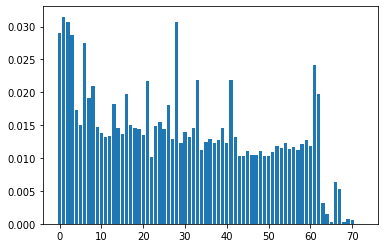

[(0.03150398684848967, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.030687599879191466, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.030667425072495372, 'Median_Household_Income'),
 (0.029078440443714555, 'Percent_Fair_or_Poor_Health'),
 (0.028785896725900394, 'Percent_Smokers'),
 (0.02752503415469635, 'Percent_Physically_Inactive'),
 (0.02417139351236979, 'Avg_Temp_C'),
 (0.02193571535477719, 'Percent_Insufficient_Sleep'),
 (0.02185543447129688, 'Household_Income_White'),
 (0.021747733351049518, 'Polution_Average_Daily_PM2.5')]

In [70]:
importances = et_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

### Summary
**Extra Trees** accuracy is **58%**. The lowest recall is level 3 (Medium - Heart Disease Motality) 26% while level 1 (low) is 58%, level 2 (mid-low) is 67% and level 4 is 74%. This is not better to compare to **Random Forest** in both the accuracy and the recall.

Therefore, **Random Forest** is the best in tree classifiers in both the accuracy and the recall.

# Ada Boost

In [71]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=256)

In [72]:
ab_model = ab_model.fit(X_train_scaled, y_train)

In [73]:
# Run the test with model
y_pred = ab_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5338541666666666

In [74]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,115,52,9,4
Actual 2,73,110,35,21
Actual 3,8,47,44,57
Actual 4,6,15,31,141


In [75]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.64      0.60       180
           2       0.49      0.46      0.48       239
           3       0.37      0.28      0.32       156
           4       0.63      0.73      0.68       193

    accuracy                           0.53       768
   macro avg       0.52      0.53      0.52       768
weighted avg       0.52      0.53      0.52       768



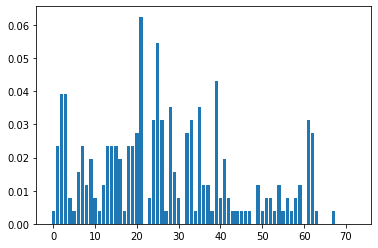

[(0.0625, 'Polution_Average_Daily_PM2.5'),
 (0.0546875, 'Percent_Long_Commute'),
 (0.04296875, 'Population_Hispanic'),
 (0.0390625, 'Percent_Smokers'),
 (0.0390625, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.03515625, 'Population_Black'),
 (0.03515625, 'Median_Household_Income'),
 (0.03125, 'Percent_Drive_Alone_to_Work'),
 (0.03125, 'Percent_Adults_with_Diabetes'),
 (0.03125, 'Household_Income_White')]

In [76]:
importances = ab_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

### Summary
**Ada Boost** accuracy is 53%. The lowest recall is level 3 (Medium - Heart Disease Motality) 28% while level 1 (low) is 64%, level 2 (mid-low) is 46% and level 4 is 73%. The accuracy and the recall is not better than others.

# Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=78)

In [78]:
gb_model = gb_model.fit(X_train_scaled, y_train)

In [79]:
# Run the test with model
y_pred = gb_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5859375

In [80]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,108,65,3,4
Actual 2,37,159,25,18
Actual 3,7,56,48,45
Actual 4,5,20,33,135


In [81]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.60      0.64       180
           2       0.53      0.67      0.59       239
           3       0.44      0.31      0.36       156
           4       0.67      0.70      0.68       193

    accuracy                           0.59       768
   macro avg       0.58      0.57      0.57       768
weighted avg       0.58      0.59      0.58       768



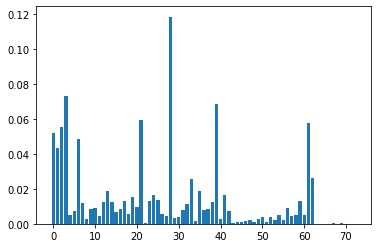

[(0.1185184000951125, 'Median_Household_Income'),
 (0.0729862844500545, 'Percent_Smokers'),
 (0.0684358975176758, 'Population_Hispanic'),
 (0.05941517246268989, 'Polution_Average_Daily_PM2.5'),
 (0.057490231334011016, 'Avg_Temp_C'),
 (0.05531265739748078, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.05174338286793325, 'Percent_Fair_or_Poor_Health'),
 (0.0482568518308539, 'Percent_Physically_Inactive'),
 (0.04316991205189218, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.026015179475229355, 'Avg_Precipitation_Inches')]

In [82]:
importances = gb_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

### Summary
**Gradient Boosting** accuracy is 59%. The lowest recall is level 3 (Medium - Heart Disease Motality) 31% while level 1 (low) is 60%, level 2 (mid-low) is 67% and level 4 is 70%. The accuracy and the recall are much better. It is the best in the boosting classifiers. Its results are very close to the **Random Forest**.

We would like to choose the **Random Forest** Classifiers for our model becuase it gives us more flexible to tune-up and to know the data store with the tree-graph.

# Run our data with the Deep Learing
We would like to see how good our selection features are

In [83]:
# Change target to train with Deep learning
# High (3,4) or Low (1,2)
y_test =np.array([1 if x in [3,4] else 0 for x in y_test])
y_train =np.array([1 if x in [3,4] else 0 for x in y_train])

# Deep Learning

In [84]:
import tensorflow as tf
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features*3
hidden_nodes_layer2 = number_input_features*2
hidden_nodes_layer3 = number_input_features*1
hidden_nodes_layer4 = number_input_features//2


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fouth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 219)               16206     
_________________________________________________________________
dense_1 (Dense)              (None, 146)               32120     
_________________________________________________________________
dense_2 (Dense)              (None, 73)                10731     
_________________________________________________________________
dense_3 (Dense)              (None, 36)                2664      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 37        
Total params: 61,758
Trainable params: 61,758
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [86]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 2304 samples
Epoch 1/100
2304/2304 [==============================] - 1s 295us/sample - loss: 0.4560 - accuracy: 0.7938
Epoch 2/100
2304/2304 [==============================] - 0s 73us/sample - loss: 0.3771 - accuracy: 0.8420
Epoch 3/100
2304/2304 [==============================] - 0s 78us/sample - loss: 0.3520 - accuracy: 0.8520
Epoch 4/100
2304/2304 [==============================] - 0s 76us/sample - loss: 0.3113 - accuracy: 0.8685
Epoch 5/100
2304/2304 [==============================] - 0s 76us/sample - loss: 0.2986 - accuracy: 0.8750
Epoch 6/100
2304/2304 [==============================] - 0s 76us/sample - loss: 0.2498 - accuracy: 0.8941
Epoch 7/100
2304/2304 [==============================] - 0s 79us/sample - loss: 0.2190 - accuracy: 0.9175s - loss: 0.2140 - accuracy: 0.
Epoch 8/100
2304/2304 [==============================] - 0s 76us/sample - loss: 0.1912 - accuracy: 0.9262
Epoch 9/100
2304/2304 [==============================] - 0s 75us/sample - loss: 0.1500 - accuracy:

2304/2304 [==============================] - 0s 85us/sample - loss: 1.3234e-05 - accuracy: 1.0000
Epoch 76/100
2304/2304 [==============================] - 0s 128us/sample - loss: 1.2601e-05 - accuracy: 1.0000
Epoch 77/100
2304/2304 [==============================] - 0s 93us/sample - loss: 1.1977e-05 - accuracy: 1.0000
Epoch 78/100
2304/2304 [==============================] - 0s 95us/sample - loss: 1.1396e-05 - accuracy: 1.0000
Epoch 79/100
2304/2304 [==============================] - 0s 81us/sample - loss: 1.0844e-05 - accuracy: 1.0000
Epoch 80/100
2304/2304 [==============================] - 0s 81us/sample - loss: 1.0334e-05 - accuracy: 1.0000
Epoch 81/100
2304/2304 [==============================] - 0s 77us/sample - loss: 9.8609e-06 - accuracy: 1.0000
Epoch 82/100
2304/2304 [==============================] - 0s 87us/sample - loss: 9.4013e-06 - accuracy: 1.0000s - loss: 9.8913e-06 - accuracy: 
Epoch 83/100
2304/2304 [==============================] - 0s 99us/sample - loss: 8.9722e-06

In [87]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

768/768 - 0s - loss: 1.9896 - accuracy: 0.8021
Loss: 1.9896108234922092, Accuracy: 0.8020833134651184
